Compare with 'sklearn - Linear Regression - Practical Example (Part 5)_with_comments'

This one was made with fewer 'data cleaning' as a comparison model

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('db/1.04. Real-life example.csv')
data 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


Preprocessing

In [4]:
#Removing missing data
data1 = data.dropna(axis=0)

data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


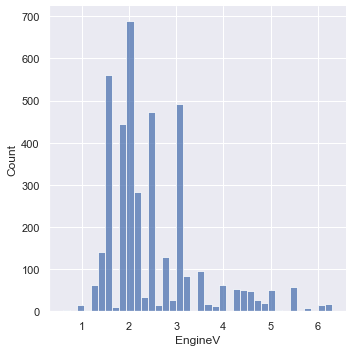

In [5]:
#removing discrepant/incorrect values from 

data2 = data1[data1['EngineV']<6.5]
sns.displot(data2['EngineV'])

In [6]:
data_cleaned = data2.reset_index(drop=True)

Text(0.5, 1.0, 'Price and Model')

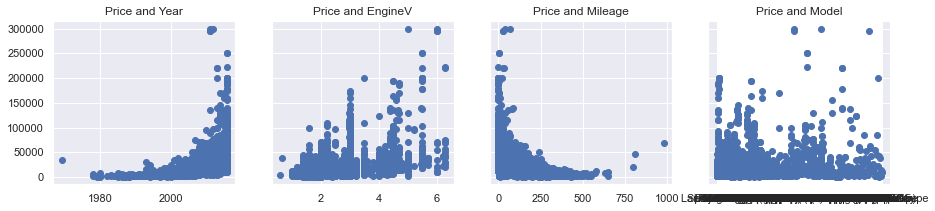

In [7]:
f, (g1,g2,g3,g4) = plt.subplots(1,4,sharey=True,figsize=(15,3))
y=data_cleaned['Price']
g1.scatter(data_cleaned['Year'],y)
g1.set_title('Price and Year')
g2.scatter(data_cleaned['EngineV'],y)
g2.set_title('Price and EngineV')
g3.scatter(data_cleaned['Mileage'],y)
g3.set_title('Price and Mileage')
g4.scatter(data_cleaned['Model'],y)
g4.set_title('Price and Model')



In [8]:
#Creating dummy variables

data_dummies= pd.get_dummies(data_cleaned, drop_first=True)
cols = data_dummies.columns.values
data_prep = data_dummies[cols]

In [21]:
data_prep.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Defining variables

y = data_prep['Price']

x = data_prep.drop(['Price'],axis=1)

In [11]:
#Scaling the data
scaler = StandardScaler()
scaler.fit(x)

x_scaled= scaler.transform(x)

In [12]:
#Train Test Split

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=.2,random_state=42)

Train data

In [13]:
#Linear Regression

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

y_hat = $\hat{y}$ -> usual mathematical representation

In [14]:
y_hat = reg.predict(x_train)

<AxesSubplot: xlabel='Price'>

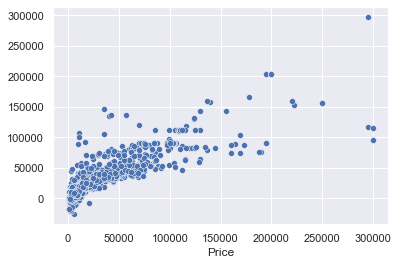

In [15]:
 #graph comparing the expected data with the predicted one

sns.scatterplot(data=reg, x=y_train,y=y_hat)

#comparing with the model where the data was cleaned, this has a lot more outliers and scaterred data

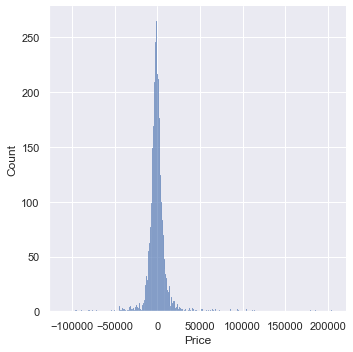

In [16]:
#graph showing the difference between the 'correct' and the precdicted one

sns.displot(y_train-y_hat)

In [17]:
#model score
reg.score(x_train,y_train)

0.7546876846299628

Test data

In [18]:
y_hat_test = reg.predict(x_test)

<AxesSubplot: xlabel='Price'>

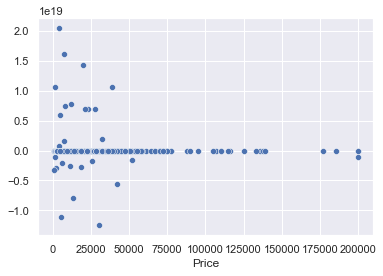

In [19]:
#graph comparing the expected data with the predicted one

sns.scatterplot(x=y_test,y=y_hat_test)